In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('madfhantr.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [28]:
le=LabelEncoder()

In [5]:
df.drop('Loan_ID',axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df_n=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']].apply(LabelEncoder().fit_transform)

In [7]:
df_n

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


In [8]:
x=df_n.drop('Loan_Status',axis=1)

In [9]:
y=df_n['Loan_Status']

In [10]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,376,0,203,8,1,2
1,1,1,1,0,0,306,60,81,8,1,0
2,1,1,0,0,1,139,0,26,8,1,2
3,1,1,0,1,0,90,160,73,8,1,2
4,1,0,0,0,0,381,0,94,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0
610,1,1,3,0,0,275,0,7,5,1,0
611,1,1,1,0,0,431,3,162,8,1,2
612,1,1,2,0,0,422,0,132,8,1,2


In [11]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [12]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [13]:
x.value_counts()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
0       0        0           0          0              3                229                66          9                 1               0                1
1       1        1           0          0              288              198                121         3                 1               0                1
                                                       183              0                  49          8                 1               1                1
                                                       186              211                110         8                 1               2                1
                                                       193              173                122         8                 1               1                1
                                                                     

In [25]:
tr_in,tr_ot,ts_in,ts_ot=train_test_split(x,y,test_size=0.25)

In [23]:
dt=DecisionTreeClassifier().fit(tr_in,ts_in)

In [24]:
dt.score(tr_ot,ts_ot)

0.7077922077922078

[Text(0.2865783410138249, 0.9705882352941176, 'X[9] <= 0.5\ngini = 0.438\nsamples = 460\nvalue = [149, 311]'),
 Text(0.041474654377880185, 0.9117647058823529, 'X[5] <= 291.5\ngini = 0.136\nsamples = 68\nvalue = [63, 5]'),
 Text(0.03225806451612903, 0.8529411764705882, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.05069124423963134, 0.8529411764705882, 'X[5] <= 335.0\ngini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(0.027649769585253458, 0.7941176470588235, 'X[5] <= 328.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.018433179723502304, 0.7352941176470589, 'X[6] <= 48.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.009216589861751152, 0.6764705882352942, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.027649769585253458, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03686635944700461, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07373271889400922, 0.7941176470588235, 'X[8] <= 6.0\ngini = 0.142\nsamples = 

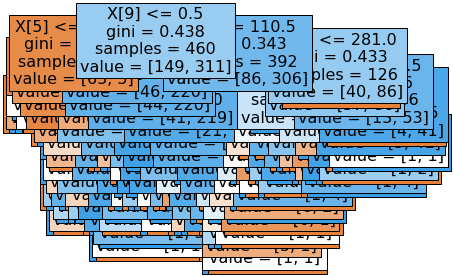

In [26]:
plot_tree(dt,filled=True,fontsize=16)